<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Zomato-restaurant-clustering-and-sentiment-analysis/blob/main/Gayatri_zomato_restaurant_claustering_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import math,unique

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')

In [4]:
df.head(5)

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
reviews = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

In [6]:
reviews.head(5)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [9]:
df.shape

(105, 6)

In [10]:
reviews.shape

(10000, 7)

In [11]:
df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [12]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [13]:
df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [14]:
reviews.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

In [15]:
df.drop(['Links', 'Timings'], axis=1, inplace=True)

In [16]:
df.head(2)

Name Cost                                        Collections  \
0  Beyond Flavours  800  Food Hygiene Rated Restaurants in Hyderabad, C...   
1         Paradise  800                                Hyderabad's Hottest   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese

In [17]:
#Here we had cost column with numbers seperated by commas. So we are trying to remove comma which ever is present in Cost column.
#Then we convert Cost column to float
df['Cost'] = df['Cost'].str.replace(",","").astype('float')

In [18]:
df.head(5)

Name    Cost  \
0                 Beyond Flavours   800.0   
1                        Paradise   800.0   
2                        Flechazo  1300.0   
3  Shah Ghouse Hotel & Restaurant   800.0   
4      Over The Moon Brew Company  1200.0   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

In [19]:
#Renaming the Name as restuarant as same as Reviews dataframe.
df.rename(columns={'Name':'Restaurant'},inplace=True)
     

In [20]:
df.head(2)

Restaurant   Cost                                        Collections  \
0  Beyond Flavours  800.0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1         Paradise  800.0                                Hyderabad's Hottest   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese

In [21]:
reviews = reviews[reviews['Rating']!= 'Like']
#We have only string type present ('Like') in Rating column of reviews_df. So we drop it.

In [22]:
reviews['Rating']= reviews['Rating'].astype('float64')
#we convert rating column into float

In [23]:
#Converting Time column to DateTime
import datetime
reviews['Time'] = pd.to_datetime(reviews['Time'])

In [24]:
reviews.head(5)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [25]:
df.isna().sum()
#missing values


Restaurant      0
Cost            0
Collections    54
Cuisines        0
dtype: int64

In [26]:
reviews.isna().sum()


Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

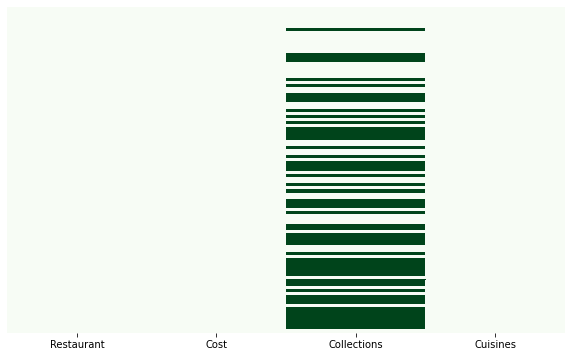

In [27]:
plt.figure(figsize = (10,6))

sns.heatmap(df.isna(), cbar= False , yticklabels = False, cmap = 'Greens')

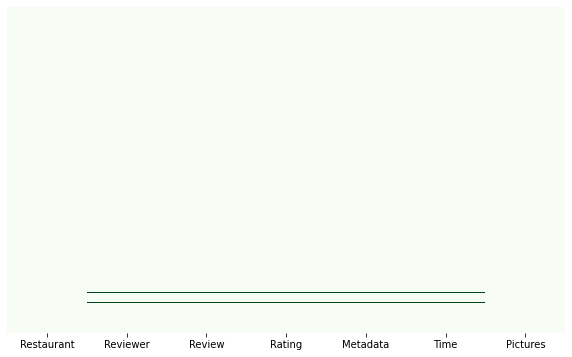

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(reviews.isna(),cbar = False, yticklabels= False, cmap = 'Greens')

In [29]:
df['Collections'].fillna('unknown', inplace = True)

In [30]:
df.isna().sum()

Restaurant     0
Cost           0
Collections    0
Cuisines       0
dtype: int64

In [31]:
reviews.dropna(inplace=True)

In [32]:
reviews.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [33]:
# removing outliers

def remove_outliers(df1,column):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title("before removing outliers")
  sns.boxplot(df1[column])
  plt.subplot(1,2,2)
  sns.distplot(df1[column])
  df1= df1[((df1[column]- df1[column].mean())/df1[column].std()).abs()<3]
  df1= df1[((df1[column]-df1[column].mean())/df1[column].std()).abs()>-3]

  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  plt.title("After removing outliers")
  sns.boxplot(df1[column])
  plt.subplot(1,2,2)
  sns.distplot(df1[column])



In [34]:
df.describe().T

count        mean        std    min    25%    50%     75%     max
Cost  105.0  861.428571  510.14973  150.0  500.0  700.0  1200.0  2800.0

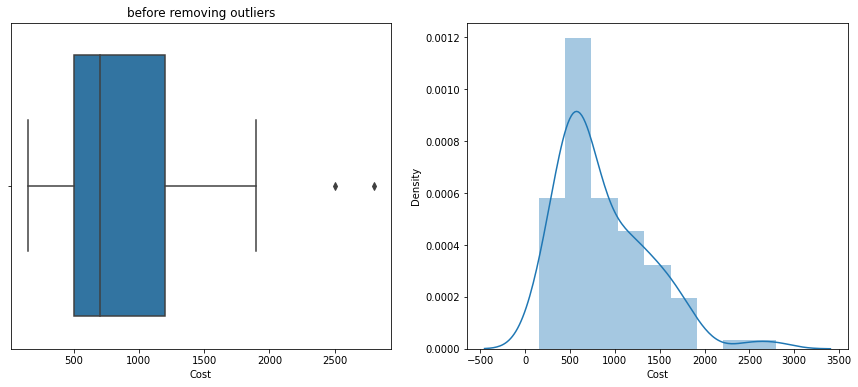

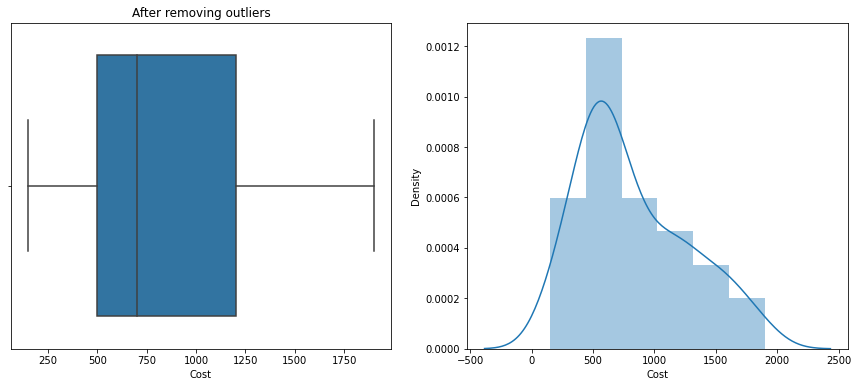

In [35]:
remove_outliers(df,'Cost')

In [36]:
reviews.describe().T

count      mean       std  min  25%  50%  75%   max
Rating    9954.0  3.600261  1.483573  1.0  3.0  4.0  5.0   5.0
Pictures  9954.0  0.751959  2.575819  0.0  0.0  0.0  0.0  64.0

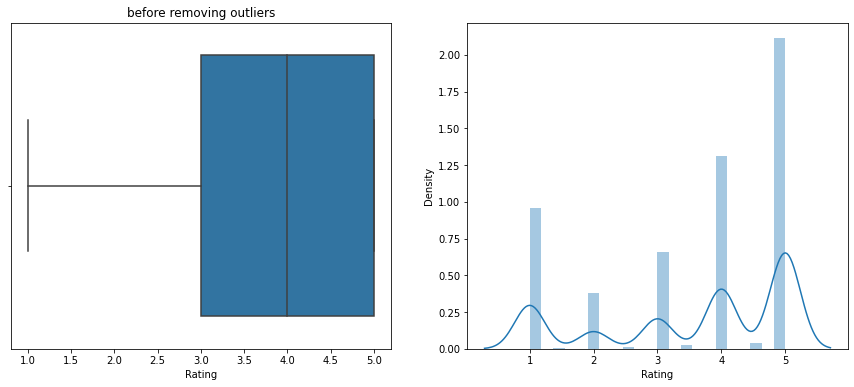

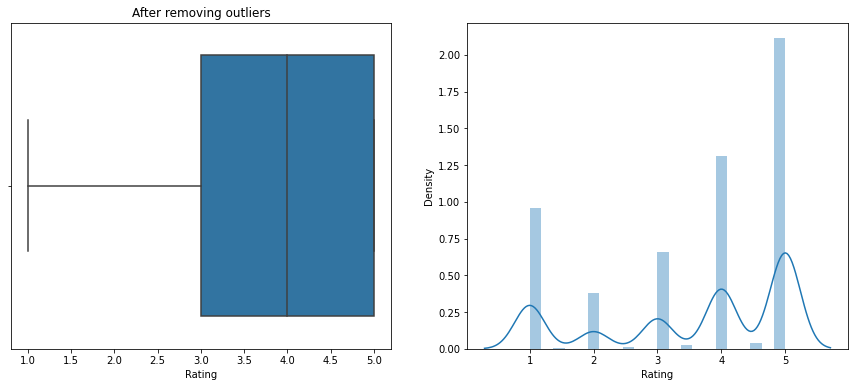

In [37]:
remove_outliers(reviews,'Rating')

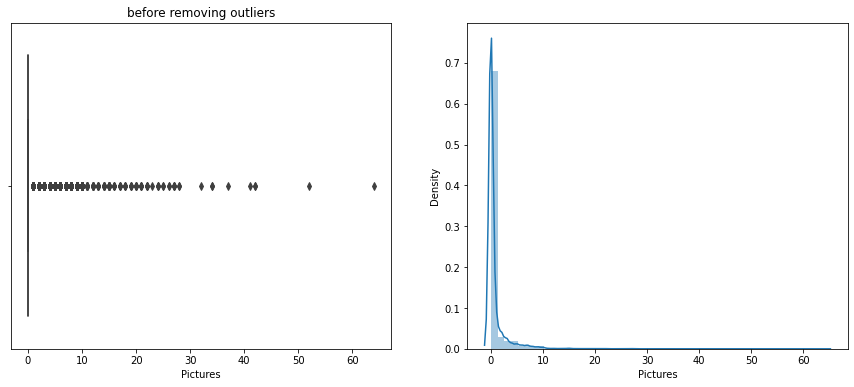

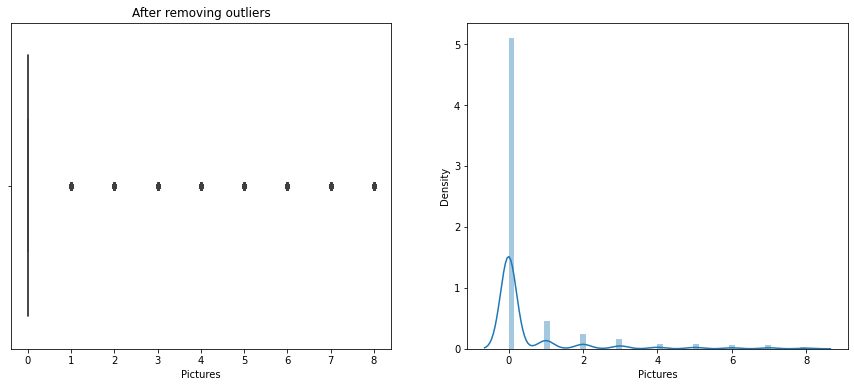

In [38]:
remove_outliers(reviews, 'Pictures')

We have string type varables present in Restuarant, collections and cuisines. So we try using the NLP on the neccessary columns for further analysis. Restuarant column has the names of all restuarants. So we focus on other 2 columns for further analysis.

# **(a) 'Collections' column**

# **1. To remove stopwords and punctuation**

In [39]:
# to remove stopwords 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
# Defining a function to remove stopwords and punctuation

#remove stopwards
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

#remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [41]:
df['Collections'] = df['Collections'].apply(remove_punctuation)

In [42]:

df['Collections'] = df['Collections'].apply(stopwords)

2. Count vectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['Collections']) 
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()
     

In [44]:
#list to store vocab and count
vocab = []
count = []
#iterate through each vocab and count append the value to designated list
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
#store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count,  index = vocab)
#store the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)  

# **3. Stemming**

In [45]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [46]:
df['Collections'] = df['Collections'].apply(stemming)


# **4. tfid vectorizer**

In [47]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['Collections'])   

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [48]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
     

# **5. Creating count of all words in collections as 'collections length'**

In [49]:
def length(text):   
  count = 0
  for i in range(len(text)):
    if text[i]==' ':
        count = count + 1
        
  return count+1

In [50]:
df['Collections_length'] = df['Collections'].apply(length)


In [51]:
df.head(5)

Restaurant    Cost  \
0                 Beyond Flavours   800.0   
1                        Paradise   800.0   
2                        Flechazo  1300.0   
3  Shah Ghouse Hotel & Restaurant   800.0   
4      Over The Moon Brew Company  1200.0   

                                         Collections  \
0  food hygien rate restaur hyderabad corpor favo...   
1                                  hyderabad hottest   
2                     great buffet hyderabad hottest   
3                                 late night restaur   
4  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  
0  Chinese, Continental, Kebab, European, South I...                  15  
1                     Biryani, North Indian, Chinese                   2  
2       Asian, Mediterranean, North Indian, Desserts                   4  
3  Biryani, North Indian, Chinese, Seafood, Bever...                   3  
4  Asian, Continental, North Indian, Chinese, Med...                  13

# **(b) 'Cuisines' column**

In [52]:
#Cuisines has items of resturant which are seperated by comma. So there is nothing to clean in Cuisines. 
#So we consider the count of cuisines list
list_of_cuisins = df.Cuisines.str.split(', ')

df['Cuisines_list'] = pd.Series()

for i in range(len(df)):
  df['Cuisines_list'][i] = list_of_cuisins[i]


In [53]:
#creating a new column for the total number of cusines served by restaurants
df['Total Cuisines'] = df['Cuisines_list'].apply(lambda x : len(x))
df.drop(['Cuisines_list'],axis=1,inplace=True)
     

In [54]:
df.head(3)

Restaurant    Cost                                        Collections  \
0  Beyond Flavours   800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise   800.0                                  hyderabad hottest   
2         Flechazo  1300.0                     great buffet hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   

   Total Cuisines  
0               6  
1               3  
2               4

# **2. Reviews dataframe**

In [55]:
# the meta data column will be divided into 2 new columns since there are 2 types of info available
reviews['no_of_Reviews'],reviews['no_of_Followers']=reviews['Metadata'].str.split(',').str
reviews['no_of_Reviews'] = pd.to_numeric(reviews['no_of_Reviews'].str.split(' ').str[0])
reviews['no_of_Followers'] = pd.to_numeric(reviews['no_of_Followers'].str.split(' ').str[1])
     

In [56]:
# Converting newly created columns to float
reviews['no_of_Reviews'] = reviews['no_of_Reviews'].astype('float64')
reviews['no_of_Followers'] = reviews['no_of_Followers'].astype('float64')
     

In [57]:
# extracting the date and hour from the 'Time' column
reviews['Date'] = pd.DatetimeIndex(reviews['Time']).date
reviews['Hour'] = pd.DatetimeIndex(reviews['Time']).hour
     

In [58]:
#finding out the respected day,month and year
reviews['day'] = reviews['Date'].apply(lambda x: x.weekday())
reviews['month']=reviews['Date'].apply(lambda x: x.month)
reviews['year'] = reviews['Date'].apply(lambda x: x.year)


In [59]:
#Records of days and months were interms of numbers, so converting that to string type.

#weekdays
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
reviews['day']=reviews['day'].map(week_day)
#months
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
reviews['month']=reviews['month'].map(month_dict)

In [60]:
#Dropping the metadata and time
reviews = reviews.drop(['Metadata'], axis =1)
reviews = reviews.drop(['Time'], axis =1)
     

# **VIII. EDA**

# **1. Metadata Dataframe**

In [61]:
df.head(5)

Restaurant    Cost  \
0                 Beyond Flavours   800.0   
1                        Paradise   800.0   
2                        Flechazo  1300.0   
3  Shah Ghouse Hotel & Restaurant   800.0   
4      Over The Moon Brew Company  1200.0   

                                         Collections  \
0  food hygien rate restaur hyderabad corpor favo...   
1                                  hyderabad hottest   
2                     great buffet hyderabad hottest   
3                                 late night restaur   
4  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   
3  Biryani, North Indian, Chinese, Seafood, Bever...                   3   
4  Asian, Continental, North Indian, Chinese, Med...                  13   

   Total Cuisines  
0               6  
1               3  
2               4  
3               5  
4               5

# **(i) Count of cuisines offered by restaurants**

In [62]:
list_of_cuisins = df.Cuisines.str.split(', ')

diff_cuisines = {} 
for names in list_of_cuisins: 
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:  
            diff_cuisines[name]=1 
cuisines_df = pd.DataFrame(diff_cuisines.values(), diff_cuisines.keys(),columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)
cuisines_df.head(10)

cuisines_name  cuisines_counts
5   North Indian               61
0        Chinese               43
1    Continental               21
6        Biryani               16
18     Fast Food               15
7          Asian               15
20       Italian               14
9       Desserts               13
4   South Indian                9
29        Bakery                7

Text(0, 0.5, 'count of cuisines  in  all restaurants')

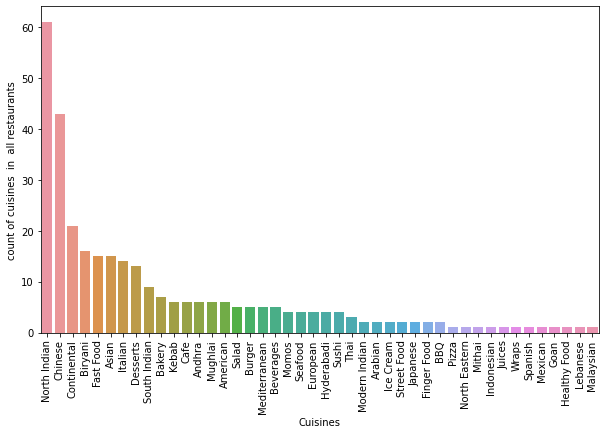

In [63]:
#diff_cuisines
fig = plt.figure(figsize=[10,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('count of cuisines  in  all restaurants')

We cna observe that 'North indian' is the Popular Cuisine which is offered by almost many resturants. And 'Malaysian' is the rare cuisine.

# (ii). Count of Collections offered by restaurants

In [64]:
list_of_collection = df.Collections.str.split(', ')
diff_coll = {} 
for names in list_of_collection: 
    for name in names:
        if (name in diff_coll):
            diff_coll[name]+=1
        else:  
            diff_coll[name]=1 
collections_df = pd.DataFrame(diff_coll.values(), diff_coll.keys(),columns = {'collection_counts'}).reset_index()
collections_df.sort_values(by = 'collection_counts',ascending = False,inplace = True) 
collections_df.rename(columns={'index':'collection_name', 'collection_name':'collection_counts'},inplace=True)
collections_df.head(10)
# since collections column has 51% null values.. we can drop it
     

collection_name  collection_counts
7                                             unknown                 54
6                  food hygien rate restaur hyderabad                  4
12                                       great buffet                  2
40                                           new gold                  2
1                                   hyderabad hottest                  2
28                                  panasian delicaci                  2
16                                       veggi friend                  2
15                                         trend week                  2
32  sunday brunch great breakfast function venu ra...                  1
27                       function venu region favorit                  1

Text(0, 0.5, 'count of collections')

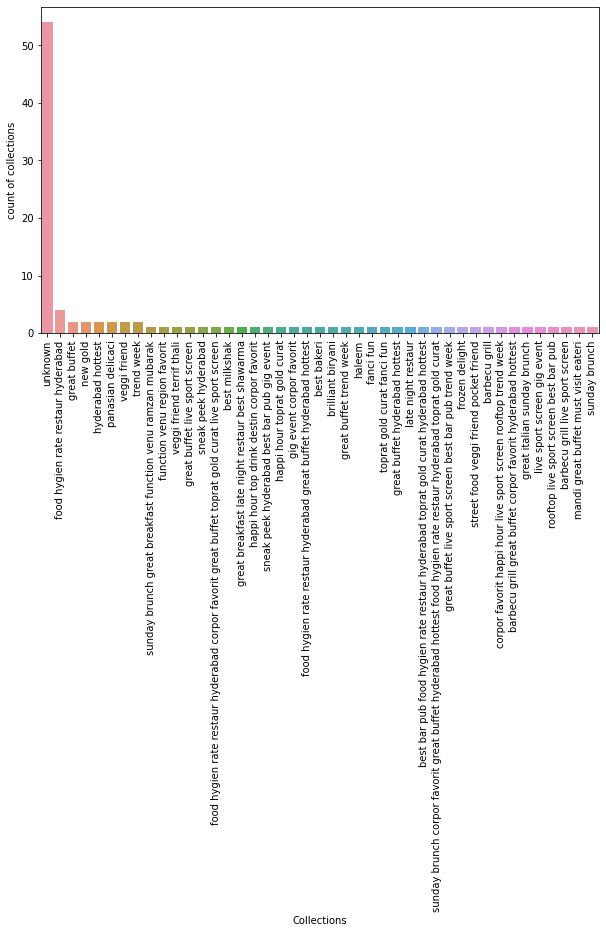

In [65]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=collections_df, x='collection_name', y= 'collection_counts')
plt.xlabel('Collections')
plt.xticks(rotation=90)
plt.ylabel('count of collections')

Collections are like a tagline whcih can be given to particular resturants. So we can get to know that the most used tagline for resturants are ' Hygine food' followed by 'Unkown'.

# **(iii). Total number of collections and cuisines wrt cost offered by each restaurant**

In [66]:
report = df.copy()

In [67]:
#taking only numeric columns to do the minmaxscaling
report_numeric = df[['Collections_length','Total Cuisines','Cost']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
report['collection_length_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
report['cuisines_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
report['cost_scaled'] = pd.Series(scaled[i][2] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Restaurant sorted with number of cuisines wrt cost')

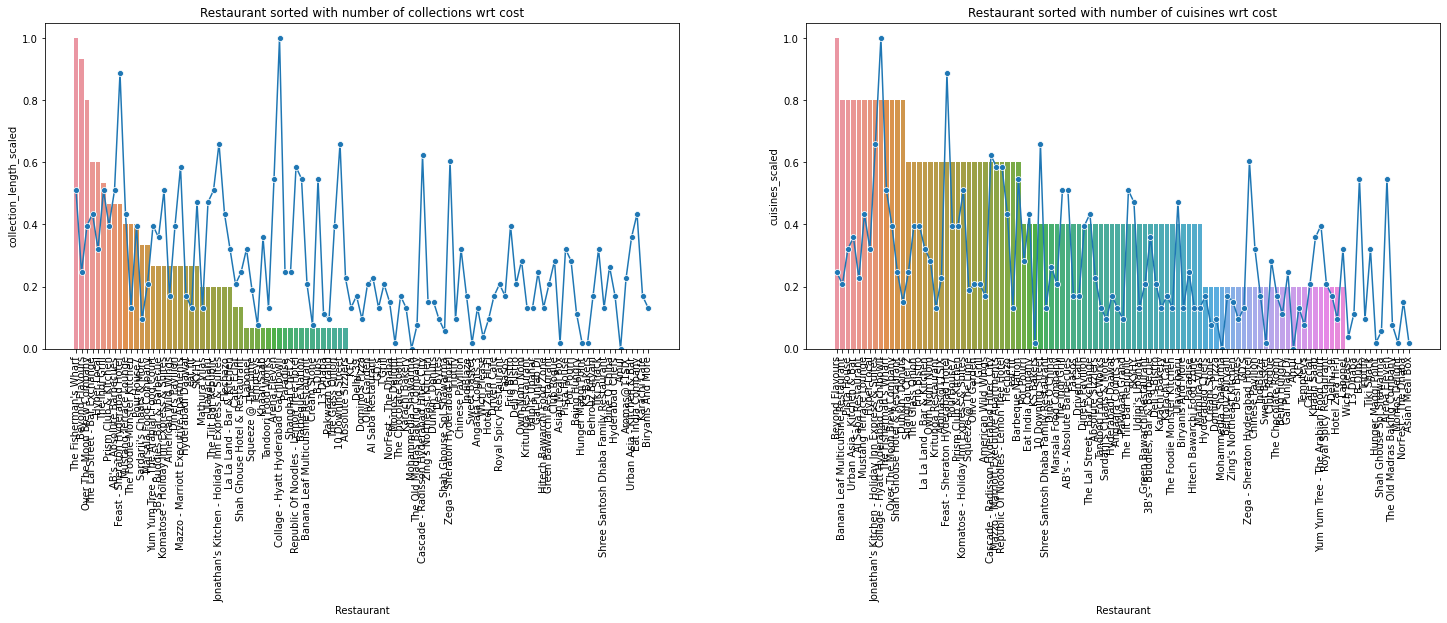

In [68]:
collection_df = report.sort_values(['Collections_length'],ascending=False)
cuisines_df = report.sort_values(['Total Cuisines'],ascending=False)

plt.figure(figsize=(25,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='collection_length_scaled',data = collection_df)
sns.lineplot(x='Restaurant',y='cost_scaled',data= collection_df,marker='o')
plt.title('Restaurant sorted with number of collections wrt cost')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='cuisines_scaled',data = cuisines_df )
sns.lineplot(x='Restaurant',y='cost_scaled',data= cuisines_df,marker='o')
plt.title('Restaurant sorted with number of cuisines wrt cost')
#speaker_report

Here the line graph represents the cost. And collections count are represnted by colored bar graphs. We can see that they are not at all related.

The left graph is sorted wrt 'Collections count'.

The right graph is sorted wrt 'Cost'.

**(iv). Average Cost of each restaurant**

In [69]:
cost_at_restaurants = df.groupby(['Restaurant'])['Cost'].mean().sort_values(ascending=False).reset_index()
cost_at_restaurants.sort_values(by = 'Cost',ascending = False,inplace = True)

cost_at_restaurants.head(10)

Restaurant    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6             Republic Of Noodles - Lemon Tree Hotel  1700.0
7              Mazzo - Marriott Executive Apartments  1700.0
8                                    Barbeque Nation  1600.0
9                                       Arena Eleven  1600.0

Text(0, 0.5, 'Cost')

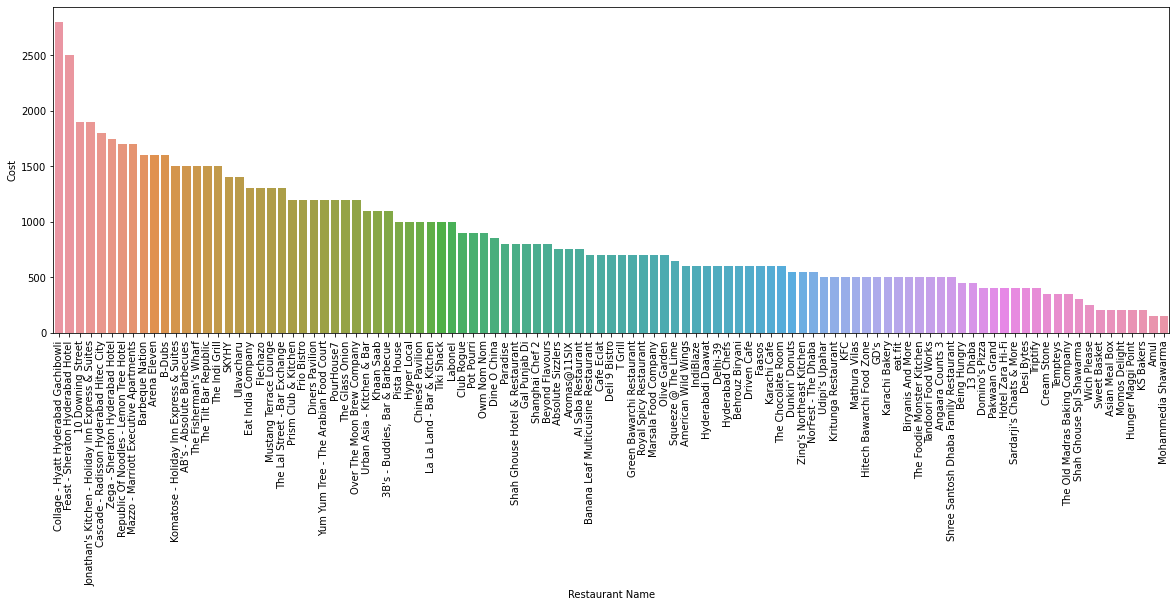

In [70]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data=cost_at_restaurants, x='Restaurant', y= 'Cost')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')

Above graph represents the graph wrt the average cost of all resturants in sorted manner.

**(v). Best Restaurant with ratings and price**

In [71]:
top_restaurants_rating = reviews.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()

restaurants_price_rating = top_restaurants_rating.merge(cost_at_restaurants,on='Restaurant',how='inner')
     

In [72]:
restaurants_price_rating.head(2)

Restaurant  Rating    Cost
0  AB's - Absolute Barbecues    4.88  1500.0
1                     B-Dubs    4.81  1600.0

In [76]:
#taking only numeric columns to do the minmaxscaling
report_numeric = restaurants_price_rating[['Rating','Cost']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
restaurants_price_rating['Rating_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
restaurants_price_rating['Cost_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

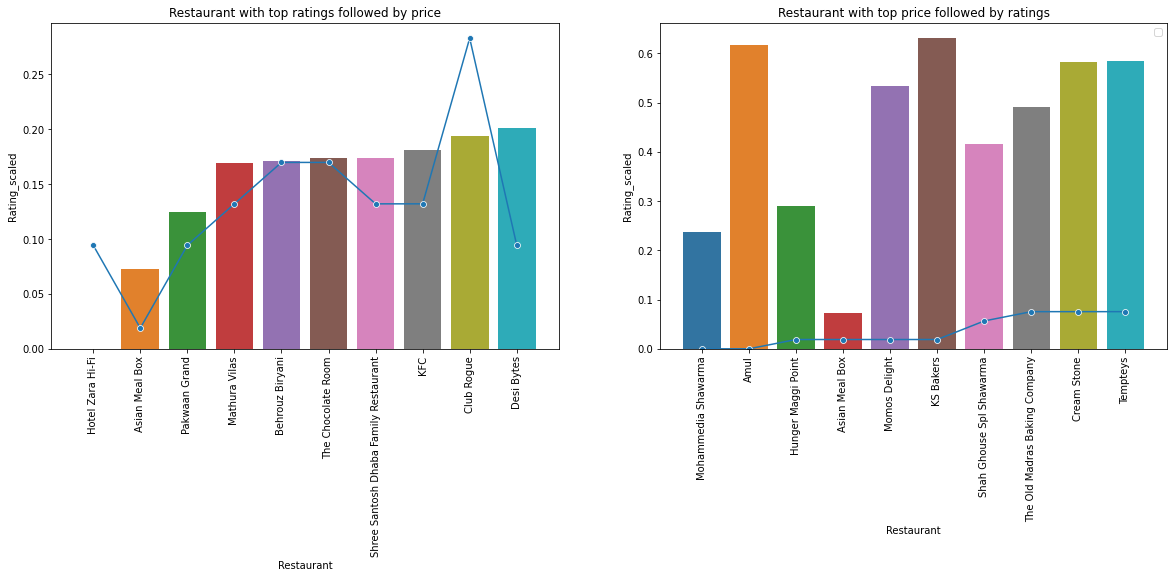

In [77]:
report_1 = restaurants_price_rating.sort_values('Rating').head(10)
report_2 = restaurants_price_rating.sort_values('Cost').head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = report_1 )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= report_1,marker='o')
plt.title('Restaurant with top ratings followed by price')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = report_2 )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= report_2,marker='o')
plt.title('Restaurant with top price followed by ratings')
plt.legend()
#speaker_report


Above graphs gives an idea about the best restuarants which has high rating along with the cost.The line chart represents the average price.

Left graph is sorted wrt price.

Right graph is sorted wrt average rating.

We can conclude that there exits some resdtuarants, even y having the more rating, the price is reasonable.

# **2. Reviews dataframe**

In [78]:
reviews.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   
3  Soumen das and Arun was a great guy. Only beca...     5.0         0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0         0   

   no_of_Reviews  no_of_Followers        Date  Hour       day month  year  
0            1.0              2.0  2019-05-25    15  Saturday   May  2019  
1            3.0              2.0  2019-05-25    14  Saturday   May  2019  
2            2.0              3.0  2019-05-24    22    Friday   May  2019  
3            1.0              1.0  2019-05-24    22    Friday   May  2019  
4            3.0              2.0  2019-05-24    21    Friday   May  2019

**(i). Restaurants available wrt different Ratings**

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64


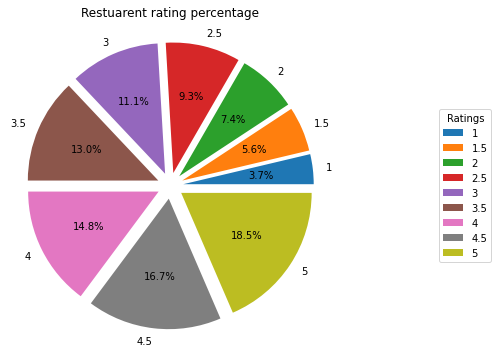

In [79]:
# Rating column visuaalization
print(reviews.Rating.value_counts())

y = np.unique(reviews['Rating'])
mylabels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

plt.figure(figsize=(10,6))
plt.pie(y, labels = mylabels, autopct = '%1.1f%%', explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title = 'Ratings',bbox_to_anchor = (1.5,0.5), loc = "right")
plt.title("Restuarent rating percentage")
plt.show()


We can see that majority of the restuarants has >3 rating.

**(ii). Average Ratings of the Top 10 restaurants**

In [80]:
top_restaurants_rating = reviews.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
top_restaurants_rating

Restaurant  Rating
0        AB's - Absolute Barbecues   4.880
1                           B-Dubs   4.810
2   3B's - Buddies, Bar & Barbecue   4.760
3                         Paradise   4.700
4                         Flechazo   4.660
..                             ...     ...
95                 Behrouz Biryani   2.825
96                   Mathura Vilas   2.820
97                   Pakwaan Grand   2.710
98                  Asian Meal Box   2.580
99                Hotel Zara Hi-Fi   2.400

[100 rows x 2 columns]

Text(0.5, 1.0, 'Top 15 Restaurants')

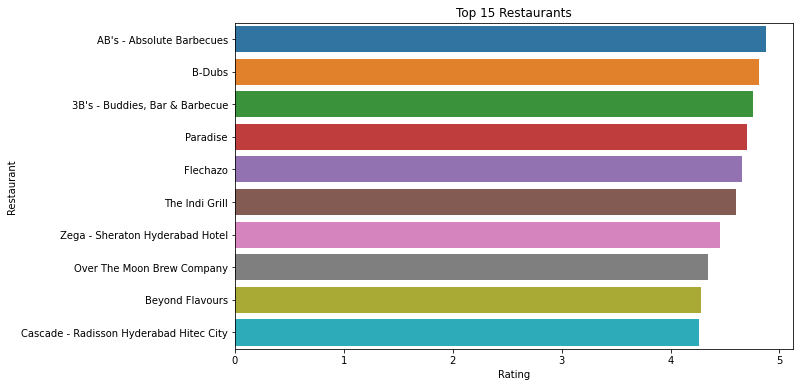

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(data= top_restaurants_rating.head(10), x='Rating', y='Restaurant')
plt.title('Top 15 Restaurants')

These are the top 15 resturants with very good rating (>3)

**(iii). Restaurant with the view of Followers and Reviews**

In [82]:
followers_reviews_report = reviews.groupby(['Restaurant'])['no_of_Followers'].sum().reset_index()
Total_reviews = reviews.groupby(['Restaurant'])['no_of_Reviews'].sum().reset_index()

In [83]:
followers_reviews_report = followers_reviews_report.merge(Total_reviews,on='Restaurant',how='left')

In [84]:
#taking only numeric columns to do the minmaxscaling
report_numeric = followers_reviews_report[['no_of_Reviews','no_of_Followers']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
followers_reviews_report['Number_of_Followers_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
followers_reviews_report['Number_of_Reviews_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Restaurant sorted with top Reviews followed by Followers')

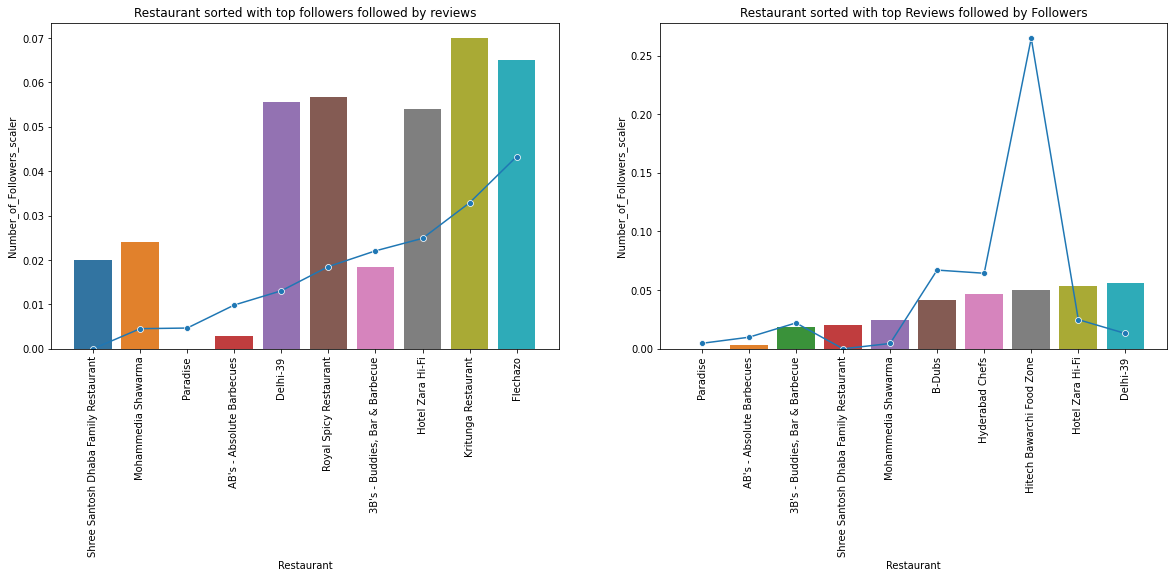

In [85]:
report_1 = followers_reviews_report.sort_values('no_of_Followers').head(10)
report_2 = followers_reviews_report.sort_values('no_of_Reviews').head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Number_of_Followers_scaler',data = report_1 )
sns.lineplot(x='Restaurant',y='Number_of_Reviews_scaler',data= report_1,marker='o')
plt.title('Restaurant sorted with top followers followed by reviews')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Number_of_Followers_scaler',data = report_2 )
sns.lineplot(x='Restaurant',y='Number_of_Reviews_scaler',data= report_2,marker='o')
plt.title('Restaurant sorted with top Reviews followed by Followers')
#speaker_report


This graph is drawn to get an idea about the number of followers and number of reviews for each resturants. The line graph represents the number of reviews and colored bar graph represents the the number of followers.

Left graph is sorted wrt followers.

Right graph is sorted wrt reviews.

**(iv). Good , Bad and Average restuarant's Reviews**

In [86]:
reviews_eda = reviews.copy()

In [87]:
#createing new rating column categorised into 3 types i.e. good, bad and average
def sentiment_rating(rating):
  # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good) and 2.5, 3, 3.5 with 0.5 (average)
  if(rating == 1 or rating == 1.5 or rating == 2):
    bad = 0
    return bad
  elif(rating == 2.5 or rating == 3 or rating == 3.5):
    average = 0.5
    return average
  elif(rating == 4 or rating == 4.5 or rating == 5):
    good = 1
    return good

#applying above function
reviews_eda["rating_classification"] = reviews_eda["Rating"].apply(sentiment_rating)


In [88]:
#Classifying the reviews as good, bad and average
good = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']
bad = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']
average = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']
     

In [89]:

from wordcloud import WordCloud
text1 = " ".join(good)
text2 = " ".join(bad)
text3 = " ".join(average)
word_cloud1 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'white').generate(text1)
word_cloud2 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'black').generate(text2)
word_cloud3 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'red').generate(text3)
     

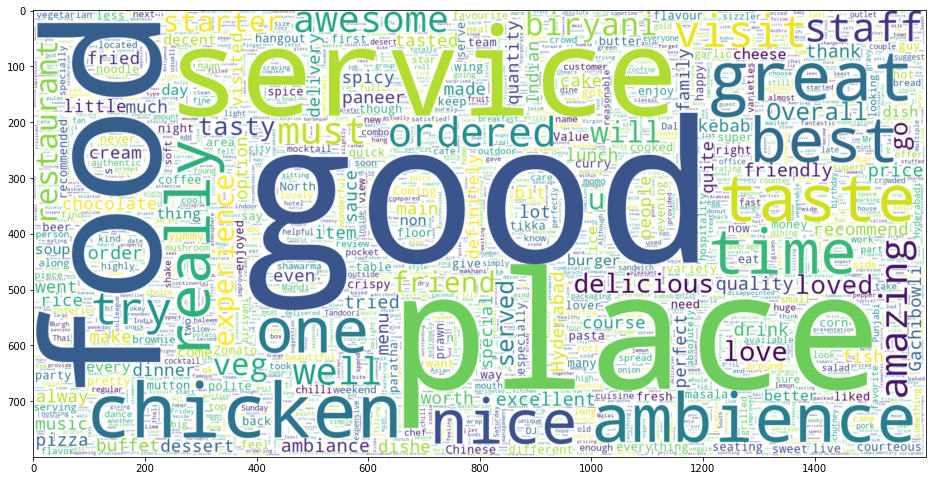

In [90]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud1,interpolation = 'bilinear')

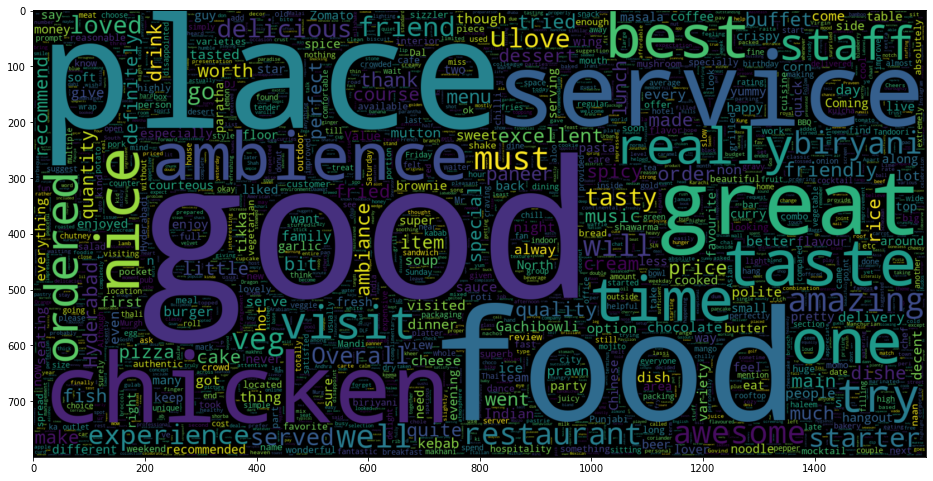

In [91]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud2,interpolation = 'bilinear')
     

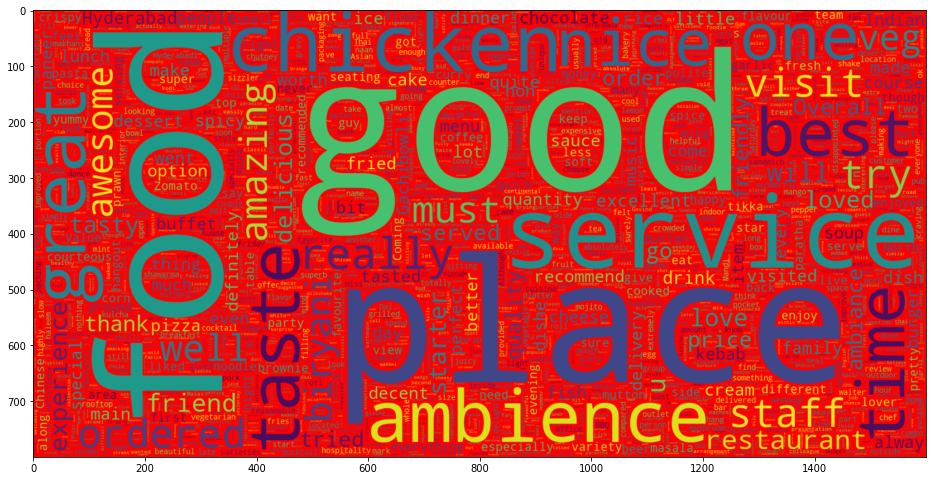

In [92]:
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud3,interpolation = 'bilinear')

# **Feature Engineering**

# **1. Feature creation**

In [93]:
df.head(2)

Restaurant   Cost                                        Collections  \
0  Beyond Flavours  800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise  800.0                                  hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   

   Total Cuisines  
0               6  
1               3

In [94]:
reviews.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   
3  Soumen das and Arun was a great guy. Only beca...     5.0         0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0         0   

   no_of_Reviews  no_of_Followers        Date  Hour       day month  year  
0            1.0              2.0  2019-05-25    15  Saturday   May  2019  
1            3.0              2.0  2019-05-25    14  Saturday   May  2019  
2            2.0              3.0  2019-05-24    22    Friday   May  2019  
3            1.0              1.0  2019-05-24    22    Friday   May  2019  
4            3.0              2.0  2019-05-24    21    Friday   May  2019

We have two dataframes here. One for clustering and other for sentiment analysis. For the clustering, we try to consider the metadata dataframe along with we try to extract some usefull informtion of the resturants like 'Rating', 'Number of followers' and 'Number of Reviews' from the other reviews dataframe.

**(a) Extracting 'rating'**

In [95]:
top_restaurants_rating.rename(columns={'Name':'Restaurant'},inplace=True)

In [96]:

top_restaurants_rating.head(2)

Restaurant  Rating
0  AB's - Absolute Barbecues    4.88
1                     B-Dubs    4.81

In [97]:
DF_meta = df.merge(top_restaurants_rating,on='Restaurant',how='left')
DF_meta.rename(columns={'Rating':'Avg Rating'},inplace=True)
DF_meta.head(3)

Restaurant    Cost                                        Collections  \
0  Beyond Flavours   800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise   800.0                                  hyderabad hottest   
2         Flechazo  1300.0                     great buffet hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   

   Total Cuisines  Avg Rating  
0               6        4.28  
1               3        4.70  
2               4        4.66

## **(b) Extracting 'number of reviews' and 'number of followers'**

In [98]:
Total_followers = pd.DataFrame(reviews.groupby(['Restaurant'])['no_of_Followers'].sum().reset_index())
Total_reviews = pd.DataFrame(reviews.groupby(['Restaurant'])['no_of_Reviews'].sum().reset_index())

In [99]:
DF_meta = DF_meta.merge(Total_reviews,on='Restaurant',how='left')
DF_meta = DF_meta.merge(Total_followers,on='Restaurant',how='left')
     

In [100]:
DF_meta.head(3)

Restaurant    Cost                                        Collections  \
0  Beyond Flavours   800.0  food hygien rate restaur hyderabad corpor favo...   
1         Paradise   800.0                                  hyderabad hottest   
2         Flechazo  1300.0                     great buffet hyderabad hottest   

                                            Cuisines  Collections_length  \
0  Chinese, Continental, Kebab, European, South I...                  15   
1                     Biryani, North Indian, Chinese                   2   
2       Asian, Mediterranean, North Indian, Desserts                   4   

   Total Cuisines  Avg Rating  no_of_Reviews  no_of_Followers  
0               6        4.28          752.0          10061.0  
1               3        4.70          252.0            798.0  
2               4        4.66          667.0           2748.0

We now consider the two dataframes from here as one which contains only string variables and other with numeric variables.

**(c) Dataframe with string variables**

In [101]:
text_DF = DF_meta[['Restaurant','Collections','Cuisines']]

In [102]:
text_DF.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                         Collections  \
0  food hygien rate restaur hyderabad corpor favo...   
1                                  hyderabad hottest   
2                     great buffet hyderabad hottest   
3                                 late night restaur   
4  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

**(d) Dataframe with numeric variables**

In [103]:
#Restaurant details with only numeric columns..
numeric_DF = DF_meta[['Cost','Collections_length','Total Cuisines','Avg Rating','no_of_Reviews','no_of_Followers']]
numeric_DF.sort_values(by=['Cost','Avg Rating'],ascending=[False,False],inplace=True,ignore_index=True)
     


In [104]:

numeric_DF.head()

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                   2               5       3.410         4764.0   
1  2500.0                   8               4       4.220         2341.0   
2  1900.0                   2               3       3.800         3990.0   
3  1900.0                   4               5       3.535         2927.0   
4  1800.0                   1               4       4.260         4444.0   

   no_of_Followers  
0          17826.0  
1          17595.0  
2          24573.0  
3          26995.0  
4          31644.0

In [105]:
numeric_DF.shape

(105, 6)

**(e) Handling missing values and treating the outliers in dataframe with Numerical variables.**

In [106]:
#check for null or missing values
numeric_DF.isna().sum()
     

Cost                  0
Collections_length    0
Total Cuisines        0
Avg Rating            5
no_of_Reviews         5
no_of_Followers       5
dtype: int64

In [107]:
#KNN to find the missing values for glucose

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
numeric_DF['Avg Rating'] = imputer.fit_transform((numeric_DF['Avg Rating'].values.reshape(-1,1)))
numeric_DF['no_of_Reviews'] = imputer.fit_transform((numeric_DF['no_of_Reviews'].values.reshape(-1,1)))
numeric_DF['no_of_Followers'] = imputer.fit_transform((numeric_DF['no_of_Followers'].values.reshape(-1,1)))

In [108]:

numeric_DF.describe()

Cost  Collections_length  Total Cuisines  Avg Rating  \
count   105.000000          105.000000      105.000000  105.000000   
mean    861.428571            2.838095        2.980952    3.601891   
std     510.149730            3.048088        1.208790    0.495736   
min     150.000000            1.000000        1.000000    2.400000   
25%     500.000000            1.000000        2.000000    3.260000   
50%     700.000000            1.000000        3.000000    3.601891   
75%    1200.000000            4.000000        4.000000    3.845000   
max    2800.000000           16.000000        6.000000    4.880000   

       no_of_Reviews  no_of_Followers  
count     105.000000       105.000000  
mean     2389.750000     16237.200000  
std      1326.382018     10576.707229  
min       252.000000       562.000000  
25%      1525.000000      9355.000000  
50%      2341.000000     15137.000000  
75%      3058.000000     21713.000000  
max      6628.000000     51068.000000

In [109]:
numeric_DF.isna().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
Avg Rating            0
no_of_Reviews         0
no_of_Followers       0
dtype: int64

Treatment of Outliers

In [110]:
numeric_DF.describe().T

count          mean           std    min      25%  \
Cost                105.0    861.428571    510.149730  150.0   500.00   
Collections_length  105.0      2.838095      3.048088    1.0     1.00   
Total Cuisines      105.0      2.980952      1.208790    1.0     2.00   
Avg Rating          105.0      3.601891      0.495736    2.4     3.26   
no_of_Reviews       105.0   2389.750000   1326.382018  252.0  1525.00   
no_of_Followers     105.0  16237.200000  10576.707229  562.0  9355.00   

                             50%        75%       max  
Cost                  700.000000   1200.000   2800.00  
Collections_length      1.000000      4.000     16.00  
Total Cuisines          3.000000      4.000      6.00  
Avg Rating              3.601891      3.845      4.88  
no_of_Reviews        2341.000000   3058.000   6628.00  
no_of_Followers     15137.000000  21713.000  51068.00

In [111]:
def remove_outliers(df1,column):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title("before removing outliers")
  sns.boxplot(df1[column])
  plt.subplot(1,2,2)
  sns.distplot(df1[column])
  df1= df1[((df1[column]- df1[column].mean())/df1[column].std()).abs()<3]
  df1= df1[((df1[column]-df1[column].mean())/df1[column].std()).abs()>-3]

  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  plt.title("After removing outliers")
  sns.boxplot(df1[column])
  plt.subplot(1,2,2)
  sns.distplot(df1[column])

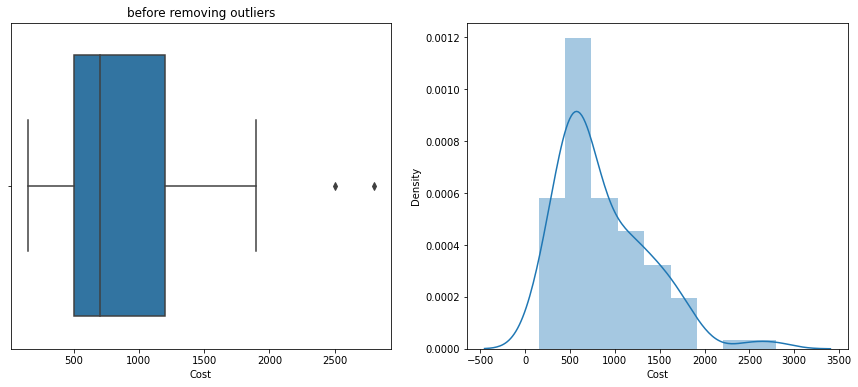

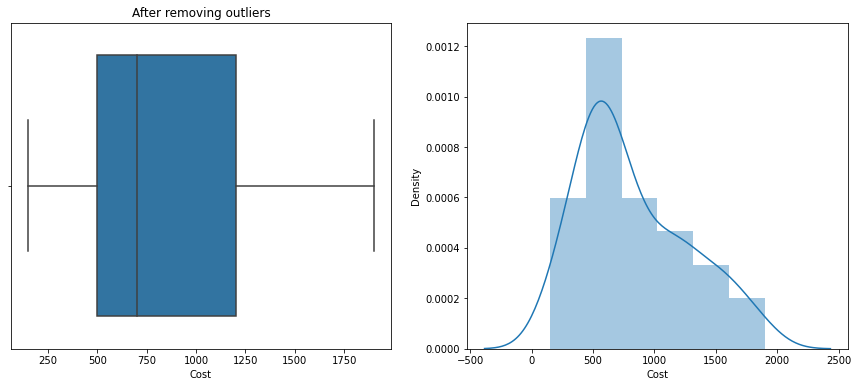

In [112]:
remove_outliers(numeric_DF, 'Cost')

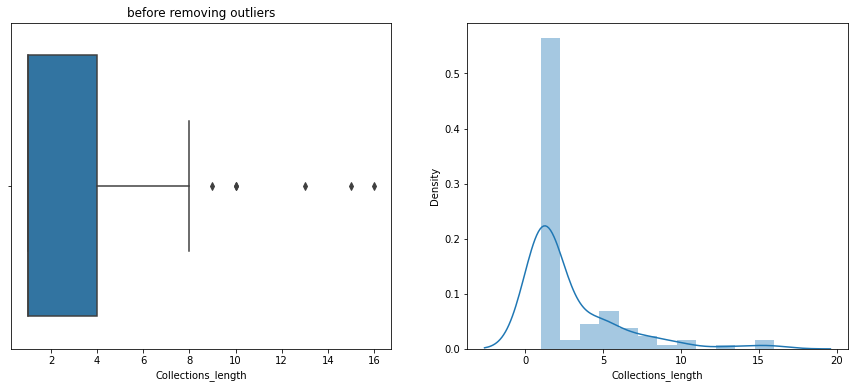

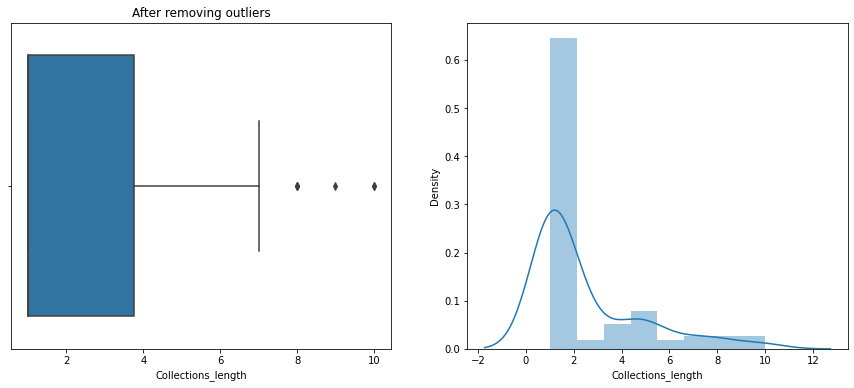

In [113]:
remove_outliers(numeric_DF, 'Collections_length')

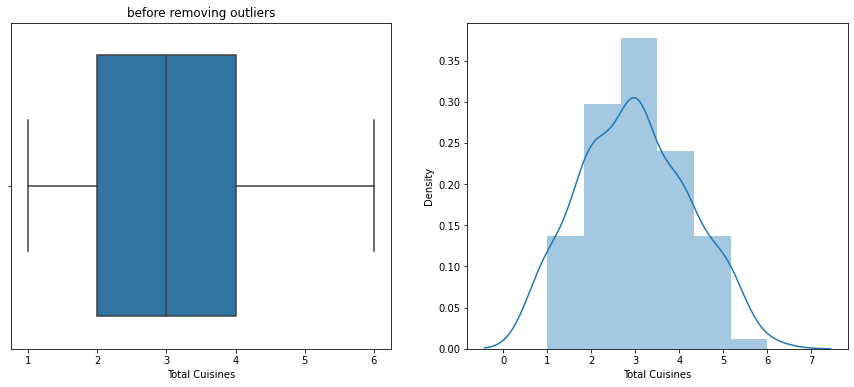

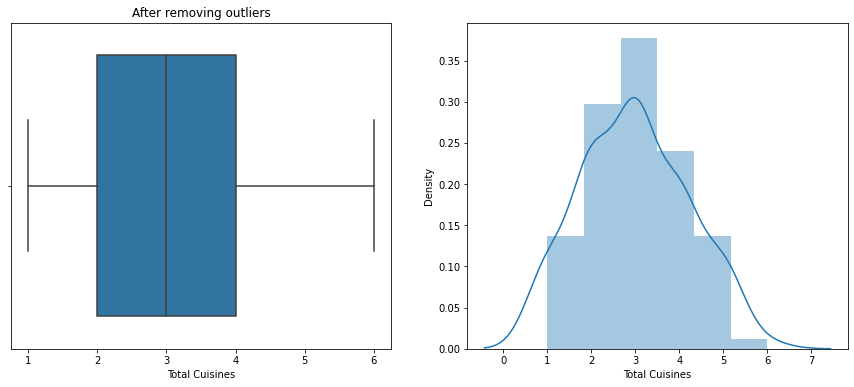

In [114]:
remove_outliers(numeric_DF, 'Total Cuisines')

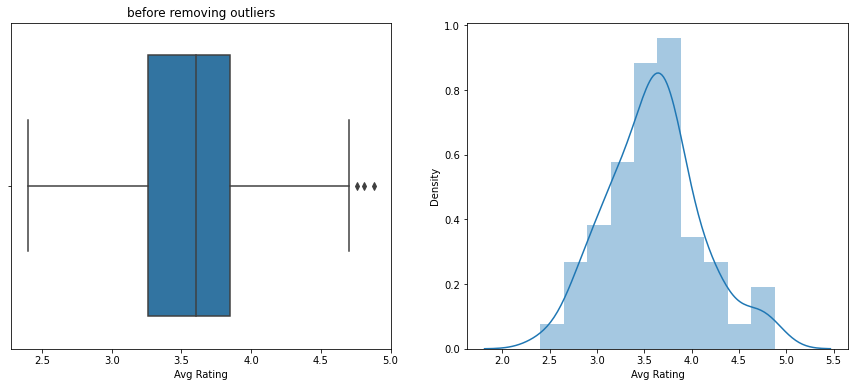

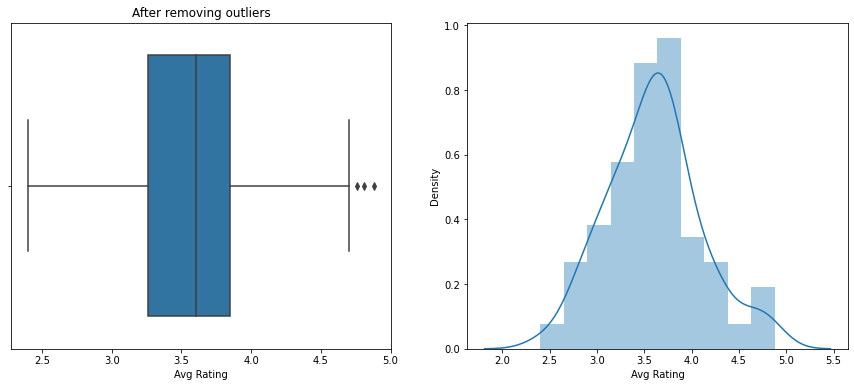

In [115]:
remove_outliers(numeric_DF, 'Avg Rating')

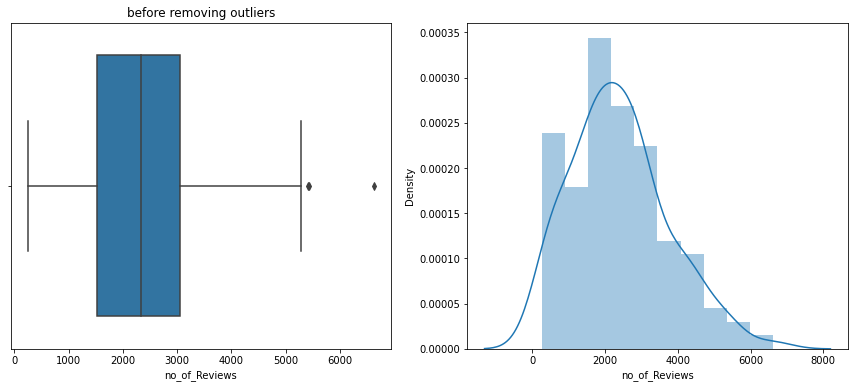

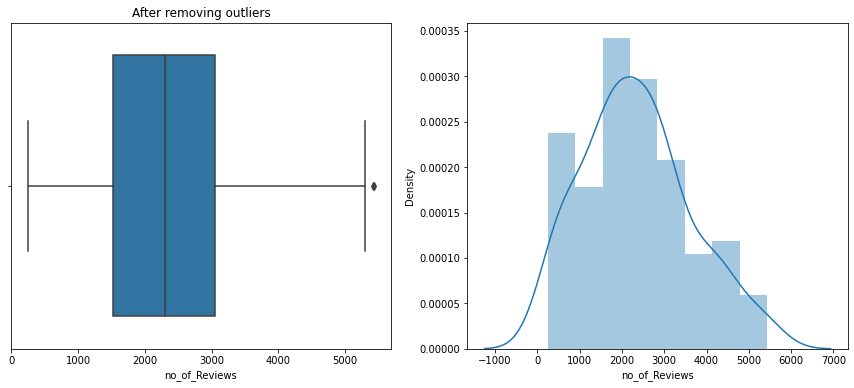

In [116]:
remove_outliers(numeric_DF, 'no_of_Reviews')

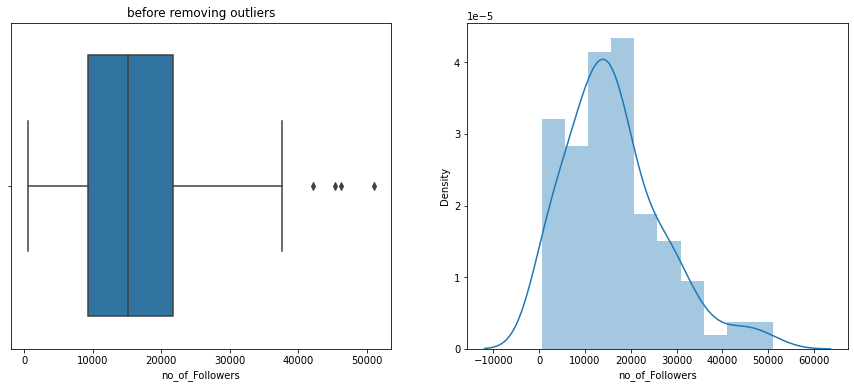

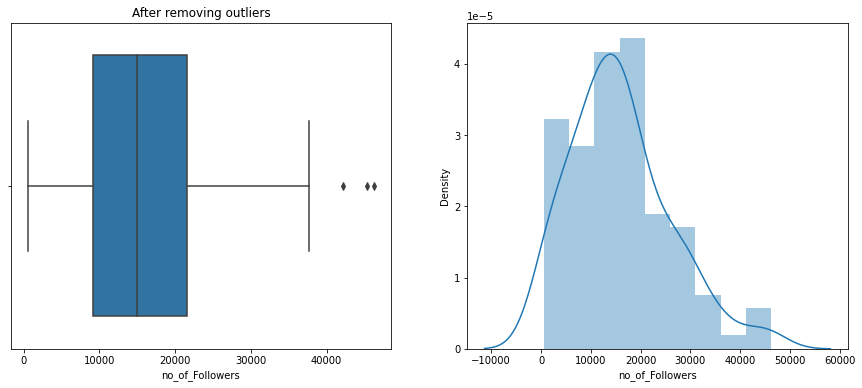

In [117]:
remove_outliers(numeric_DF, 'no_of_Followers')

In [118]:
numeric_DF.head()

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                   2               5       3.410         4764.0   
1  2500.0                   8               4       4.220         2341.0   
2  1900.0                   2               3       3.800         3990.0   
3  1900.0                   4               5       3.535         2927.0   
4  1800.0                   1               4       4.260         4444.0   

   no_of_Followers  
0          17826.0  
1          17595.0  
2          24573.0  
3          26995.0  
4          31644.0

The final dataframe so obtained.

**2. One hot encding**

In [119]:
numeric_DF = pd.concat([numeric_DF,pd.DataFrame(columns=list(diff_cuisines.keys()))])

In [120]:
numeric_DF.head(2)

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                 2.0             5.0        3.41         4764.0   
1  2500.0                 8.0             4.0        4.22         2341.0   

   no_of_Followers Chinese Continental Kebab European  ... Spanish Wraps Thai  \
0          17826.0     NaN         NaN   NaN      NaN  ...     NaN   NaN  NaN   
1          17595.0     NaN         NaN   NaN      NaN  ...     NaN   NaN  NaN   

  Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
0        NaN           NaN   NaN   NaN           NaN    NaN       NaN  
1        NaN           NaN   NaN   NaN           NaN    NaN       NaN  

[2 rows x 50 columns]

In [121]:

# iterating for every row in the dataframe
for i, row in numeric_DF.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(numeric_DF.columns):
      if column not in ['Cost','Collections_length','Total Cuisines','Avg Rating','no_of_Reviews','no_of_Followers']:
        # and check if the column is in the list of cuisines available for that row
        if column in text_DF['Cuisines']:
          #then assign it as 1 else 0
          numeric_DF.loc[i,column] = 1
        else:
          numeric_DF.loc[i,column] = 0

In [122]:
numeric_DF.head(2)

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  2800.0                 2.0             5.0        3.41         4764.0   
1  2500.0                 8.0             4.0        4.22         2341.0   

   no_of_Followers Chinese Continental Kebab European  ... Spanish Wraps Thai  \
0          17826.0       0           0     0        0  ...       0     0    0   
1          17595.0       0           0     0        0  ...       0     0    0   

  Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
0          0             0     0     0             0      0         0  
1          0             0     0     0             0      0         0  

[2 rows x 50 columns]

We have performed one hot encoding for the 'Cuisines' categorical column.

**3. Feature Scaling**

In [123]:
#Min max scaler for only numeric columns


column_names = list(numeric_DF.columns)
# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(numeric_DF)
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(numeric_DF))
DF_scaled.columns = column_names

In [124]:
DF_scaled.head()

Cost  Collections_length  Total Cuisines  Avg Rating  no_of_Reviews  \
0  1.000000            0.066667             0.8    0.407258       0.707654   
1  0.886792            0.466667             0.6    0.733871       0.327635   
2  0.660377            0.066667             0.4    0.564516       0.586261   
3  0.660377            0.200000             0.8    0.457661       0.419542   
4  0.622642            0.000000             0.6    0.750000       0.657465   

   no_of_Followers  Chinese  Continental  Kebab  European  ...  Spanish  \
0         0.341821      0.0          0.0    0.0       0.0  ...      0.0   
1         0.337247      0.0          0.0    0.0       0.0  ...      0.0   
2         0.475409      0.0          0.0    0.0       0.0  ...      0.0   
3         0.523364      0.0          0.0    0.0       0.0  ...      0.0   
4         0.615412      0.0          0.0    0.0       0.0  ...      0.0   

   Wraps  Thai  Indonesian  Modern Indian  Momos  Pizza  North Eastern  \
0    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
1    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
2    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
3    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
4    0.0   0.0         0.0            0.0    0.0    0.0            0.0   

   Mithai  Malaysian  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0  

[5 rows x 50 columns]

Above is the final dataframe which is ready for clustering.

In [125]:
Df = DF_scaled.copy()

# **X. Clustering**

Cluster analysis, or clustering, is an unsupervised machine learning task. Similarity between observations is defined using some inter-observation distance measures or correlation-based distance measures.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

Cluster analysis is an iterative process where subjective evaluation of the identified clusters is fed back into changes to algorithm configuration until a desired or appropriate result is achieved.

Many algorithms use similarity or distance measures between examples in the feature space in an effort to discover dense regions of observations.

**1. Affinity propagation**

Affinity Propagation involves finding a set of exemplars that best summarize the data.

It takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges.

It is implemented via the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.”

In [126]:
new_df = DF_scaled.copy()
new_df.pop('Cost')
new_df.insert(3,'Cost',DF_scaled['Cost'])

In [127]:
new_df.head(5)

Collections_length  Total Cuisines  Avg Rating      Cost  no_of_Reviews  \
0            0.066667             0.8    0.407258  1.000000       0.707654   
1            0.466667             0.6    0.733871  0.886792       0.327635   
2            0.066667             0.4    0.564516  0.660377       0.586261   
3            0.200000             0.8    0.457661  0.660377       0.419542   
4            0.000000             0.6    0.750000  0.622642       0.657465   

   no_of_Followers  Chinese  Continental  Kebab  European  ...  Spanish  \
0         0.341821      0.0          0.0    0.0       0.0  ...      0.0   
1         0.337247      0.0          0.0    0.0       0.0  ...      0.0   
2         0.475409      0.0          0.0    0.0       0.0  ...      0.0   
3         0.523364      0.0          0.0    0.0       0.0  ...      0.0   
4         0.615412      0.0          0.0    0.0       0.0  ...      0.0   

   Wraps  Thai  Indonesian  Modern Indian  Momos  Pizza  North Eastern  \
0    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
1    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
2    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
3    0.0   0.0         0.0            0.0    0.0    0.0            0.0   
4    0.0   0.0         0.0            0.0    0.0    0.0            0.0   

   Mithai  Malaysian  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0  

[5 rows x 50 columns]

In [128]:
DF_scaled = new_df.copy()

In [129]:
#Dataframe for Silhouette score
Y_predicted_clusters = DF_scaled.copy()
silhouette_scores_df = pd.DataFrame(columns = ['Model','Optimal_clusters','Silhouette_score'])

In [130]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AffinityPropagation

for i in range(4,0,-1):
  features = DF_scaled.columns[:-i]
  #print(features)
  X = DF_scaled[features]
  # define the model
  model = AffinityPropagation(damping=0.9)
  # fit the model
  model.fit(X)
  # assign a cluster to each example
  yhat = model.predict(X)
  clusters = unique(yhat)
  score = silhouette_score(X, yhat)
  #print(score,clusters)
  #Y_predicted_clusters["Label_AffPr"] = yhat


In [131]:
X = DF_scaled[['Collections_length','Total Cuisines']]
# affinity propagation clustering


# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
score = silhouette_score(X, yhat)
clusters = unique(yhat)


# silhouette_scores_df.loc[0] = ['Affinity Propagation',len(clusters),score]
Y_predicted_clusters["Label_AffPr"] = yhat

dict_values = {'Model':'Affinity Propagation','Optimal_clusters':len(clusters),'Silhouette_score':score}
silhouette_scores_df = silhouette_scores_df.append(dict_values,ignore_index=True)


Text(0.5, 1.0, 'Total collections vs total no of cuisines')

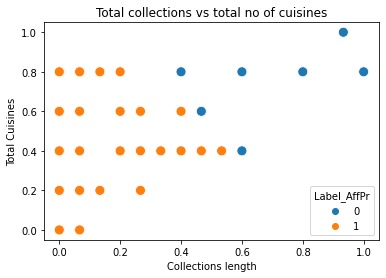

In [132]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',hue="Label_AffPr", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

In [133]:
silhouette_scores_df

Model Optimal_clusters  Silhouette_score
0  Affinity Propagation                2          0.528113

# **2. Hierarchial Clustering**

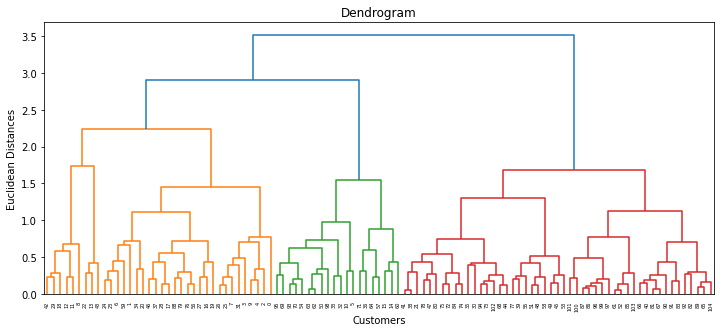

In [134]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(DF_scaled, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line
     

**Agglomerative Hierarchial Clustering**

Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

It is a part of a broader class of hierarchical clustering methods

It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data

In [135]:
X = DF_scaled[['Collections_length','Total Cuisines']]

In [136]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    score = silhouette_score(X, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
     

For n_clusters = 2, silhouette score is 0.4335107828303377
For n_clusters = 3, silhouette score is 0.48802339205161466
For n_clusters = 4, silhouette score is 0.5179964416226097
For n_clusters = 5, silhouette score is 0.5445312108726558
For n_clusters = 6, silhouette score is 0.5752795554964288
For n_clusters = 7, silhouette score is 0.6655277612619891
For n_clusters = 8, silhouette score is 0.7117623586975316
For n_clusters = 9, silhouette score is 0.7277697386377214
For n_clusters = 10, silhouette score is 0.7536748193816458
For n_clusters = 11, silhouette score is 0.7605675569175306
For n_clusters = 12, silhouette score is 0.7610761573409515
For n_clusters = 13, silhouette score is 0.7659263114121728
For n_clusters = 14, silhouette score is 0.7654432060908319
For n_clusters = 15, silhouette score is 0.7543464632722238


In [137]:
n_clusters = 7

#fit predict kmeans on  clusters
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
score = silhouette_score(X, y_hc)

Y_predicted_clusters["Label_AggClu"] = y_hc

silhouette_scores_df.loc[1] = ['Agglomerative Clustering',n_clusters,score]


Text(0.5, 1.0, 'Total collections vs total no of cuisines')

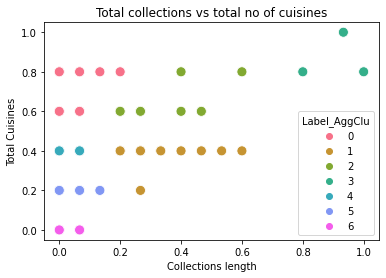

In [138]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_AggClu", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')
     

**3. dbscan clustering**

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

In [139]:
# dbscan clustering

from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=0.15, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
score = silhouette_score(X, yhat)
#print(score)
Y_predicted_clusters["Label_DBscan"] = yhat
silhouette_scores_df.loc[2] = ['DBscan Clustering',len(clusters),score]


Text(0.5, 1.0, 'Total collections vs total no of cuisines')

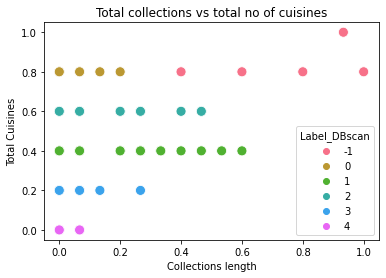

In [140]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",len(clusters)),hue="Label_DBscan", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

**4. K Means Clustering**

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

It is implemented via the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

In [141]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

#We are considering oly 2 features which are giving good results.
features_cluster=['Collections_length','Total Cuisines']
X = DF_scaled[features_cluster]

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.46900443422593047
For n_clusters = 3, silhouette score is 0.5018710810584983
For n_clusters = 4, silhouette score is 0.5223454978466936
For n_clusters = 5, silhouette score is 0.5464420893642346
For n_clusters = 6, silhouette score is 0.6255229585135863
For n_clusters = 7, silhouette score is 0.6573143332654992
For n_clusters = 8, silhouette score is 0.7010002926836538
For n_clusters = 9, silhouette score is 0.737116432602611
For n_clusters = 10, silhouette score is 0.7418852656072216
For n_clusters = 11, silhouette score is 0.7619357458705309
For n_clusters = 12, silhouette score is 0.763164107160158
For n_clusters = 13, silhouette score is 0.7578724151044443
For n_clusters = 14, silhouette score is 0.7559926988942454
For n_clusters = 15, silhouette score is 0.7752436795114607


**Elbow method**

In [142]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
     

Text(0, 0.5, 'WCSS')

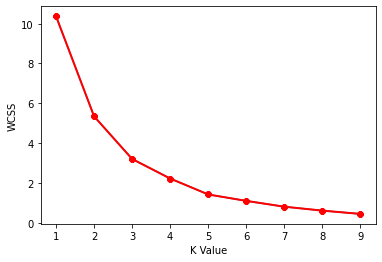

In [143]:
#The elbow curve
plt.plot(range(1,10),wcss)
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")

In [144]:
n_clusters = 7

#fit predict kmeans on  clusters
model1 = KMeans(n_clusters=7,random_state= 42)
pred_1 = model1.fit_predict(X)
score = silhouette_score(X, pred_1)

Y_predicted_clusters["Label_Kmeans"] = pred_1

silhouette_scores_df.loc[3] = ['KMeans Clustering',len(clusters),score]


In [145]:
silhouette_scores_df.head()

Model Optimal_clusters  Silhouette_score
0      Affinity Propagation                2          0.528113
1  Agglomerative Clustering                7          0.665528
2         DBscan Clustering                6          0.519814
3         KMeans Clustering                6          0.665913

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

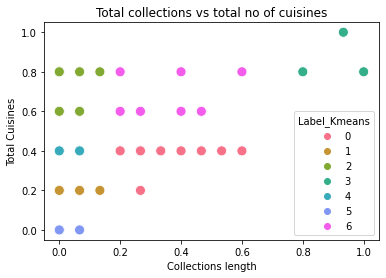

In [146]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_Kmeans", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

**5. mini-batch k-means**

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

In [147]:
# mini-batch k-means clustering

from sklearn.cluster import MiniBatchKMeans

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    model = MiniBatchKMeans(n_clusters=n_clusters)
    yhat = model.fit_predict(X)
    #clusters = unique(yhat)
    score = silhouette_score(X, yhat)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
     

For n_clusters = 2, silhouette score is 0.4542675607721722
For n_clusters = 3, silhouette score is 0.5018710810584983
For n_clusters = 4, silhouette score is 0.5106485212455107
For n_clusters = 5, silhouette score is 0.5495693981036162
For n_clusters = 6, silhouette score is 0.5951614568598714
For n_clusters = 7, silhouette score is 0.6702505779303203
For n_clusters = 8, silhouette score is 0.7026065870971089
For n_clusters = 9, silhouette score is 0.7261250181867857
For n_clusters = 10, silhouette score is 0.7557527587992677
For n_clusters = 11, silhouette score is 0.7619357458705309
For n_clusters = 12, silhouette score is 0.7654177109887519
For n_clusters = 13, silhouette score is 0.7564204647502871
For n_clusters = 14, silhouette score is 0.7745339554922631
For n_clusters = 15, silhouette score is 0.7827900976857171


In [148]:
n_clusters = 7
# mini batch kmeans clustering

from sklearn.cluster import DBSCAN

# define the model
model = MiniBatchKMeans(n_clusters=n_clusters)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
score = silhouette_score(X, yhat)
#print(score)
Y_predicted_clusters["Label_minik"] = yhat
silhouette_scores_df.loc[4] = ['mini batch k means',n_clusters,score]

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

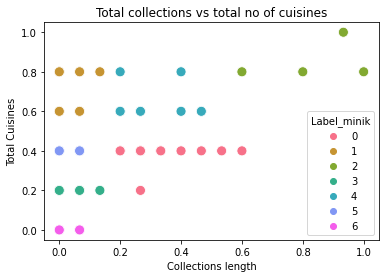

In [149]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_minik", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')
     

**6. Validation**

A variety of measures have been proposed in the literature for evaluating clustering results. The term clustering validation is used to design the procedure of evaluating the results of a clustering algorithm.

**Silhouette score -** 

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.

In [150]:
silhouette_scores_df.sort_values('Silhouette_score',ascending=False)

Model Optimal_clusters  Silhouette_score
4        mini batch k means                7          0.670334
3         KMeans Clustering                6          0.665913
1  Agglomerative Clustering                7          0.665528
0      Affinity Propagation                2          0.528113
2         DBscan Clustering                6          0.519814

Through this dataframe, we can conclude that the optimal number of clusters are 7 (or 6). Except the affinity propagation, all other models are giving the optimal clusters as 7(or 6).

# **XI. Sentimental analysis**

**1. Loading the data**

In [151]:
reviews.head(3)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   

   no_of_Reviews  no_of_Followers        Date  Hour       day month  year  
0            1.0              2.0  2019-05-25    15  Saturday   May  2019  
1            3.0              2.0  2019-05-25    14  Saturday   May  2019  
2            2.0              3.0  2019-05-24    22    Friday   May  2019

In [152]:
# Considering only those columns whihc are needed for the analysis
sentiment_df = reviews[['Review','Rating']]

In [153]:
# Null values
sentiment_df.isna().sum()

Review    0
Rating    0
dtype: int64

In [154]:
#Looking at the random review to get to know the type of strings involved in comments
sentiment_df['Review'][78]
#As we can see there are some emojis present in here.
#We have to well perform the data preprocessing berfore starting with the Sentiment analysis

'Ambience is good and staff are polite and friendly. Food is super good and had nice time having lunch .... keep up the good work. Thank you for your nice hospitality. Loved it 💕 💕 💕'

In [155]:
sentiment_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [156]:
sentiment_df.shape

(9954, 2)

**2. Text preprocessing**

We have to remove

(1) Punctuations

(2) multiple spaces

(3) Emojis

(4) Numbers and ratings specified within the review

(5) \n present in review

(6) stop words and special characters

(7) need to use lemmatization

In [157]:
# converting the statements in reviews to lower alphabets
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head(3)

Review  Rating
0  the ambience was good, food was quite good . h...     5.0
1  ambience is too good for a pleasant evening. s...     5.0
2  a must try.. great food great ambience. thnx f...     5.0

In [158]:
# cleaning the dataset by removing the punctuations and all
import re
import string

#To remove emoji
def remove_Emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#to remove ratings along with \n
def remove_rating(rating):
  rating=re.sub(r'([0.-9.]+/+[0.-9.]+)','',rating) #using regx
  rating=re.sub(r'(\n+)','',rating) #removes \n
  return rating

#to remove numbers 
def remove_number(x):
  output = re.sub(r'\d+[a-zA-Z0-9_.+-]+', '',x)
  output = re.sub(r'[a-zA-Z0-9_.+-]+\d', '',output)
  output = re.sub(r'\d+', '',output)
  return output

#to remove punctuations and special characters
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return nopunc


#to remove [] brackets ''' quotes 
def clean_text(text):
    '''remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub(r'.*?', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[''""...]', '', text)
    return text

#to remove stop words
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_spacy]))


#to remove multiple spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_Emoji(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_rating(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_number(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(text_process)
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:clean_text(x) )


In [159]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 44.6 MB/s 
     |████████████████████████████████| 287 kB 73.9 MB/s 


In [160]:
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

In [ ]:
#Converting word to its root form

In [161]:
#download small spacy model
import spacy

!python -m spacy download en_core_web_sm
spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-26 16:19:48.904801: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 33.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [162]:
#Lemmatization
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l)

sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:lemmatization_(x))
     

In [ ]:
#to remove rarely used words

In [163]:

#Rarely used words and word count
word=' '.join(sentiment_df['Review']).split()
words_df = pd.Series(word)

In [166]:
words_df

Series([], dtype: float64)

In [165]:
sentiment_df['Review'][1]

''

In [167]:
top_10_words = words_df.value_counts()[0:10]
least_10_words = words_df.value_counts(ascending=True)[0:10]
     

In [168]:
least_10_words

Series([], dtype: int64)

In [169]:
#Removing words which are rarely used 
def remove_rarely_used_words(review):
  review=" ".join([i for i in review.split() if len(i)>3])
  return review

sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_rarely_used_words(x))

In [170]:
df = sentiment_df.copy()

In [171]:
df.head(3)

Review  Rating
0            5.0
1            5.0
2            5.0

# **3. Feature engineering**

In [172]:
#Creating 2 categories based on the rating 
def sentiment(rating):
  if rating >=3.5:
    return 1 
    # positive statement
  else:
    return 0
    # negative

In [173]:
df['sentiment']=df['Rating'].apply(lambda x:sentiment(x))
df.head(5)
     

Review  Rating  sentiment
0            5.0          1
1            5.0          1
2            5.0          1
3            5.0          1
4            5.0          1

In [174]:
# creating x and y varibles for independent and dependent variable
X = df['Review']
y = df['sentiment']

The data is all set for further analysis. We now start with building models.

**4. Train and test split**